# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     | Emilio Navarro  |
| **Fecha**      |  2-02-26 |
| **Expediente** |  757955 |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv("Advertising.csv")


In [8]:
print(df.head())
print(df.columns)

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [10]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [13]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Presupuesto total de publicidad
df["publicidad_total"] = df["TV"] + df["radio"] + df["newspaper"]

# Mostrar las primeras filas con la nueva columna
print(df[["TV", "radio", "newspaper", "publicidad_total", "sales"]].head())


      TV  radio  newspaper  publicidad_total  sales
0  230.1   37.8       69.2             337.1   22.1
1   44.5   39.3       45.1             128.9   10.4
2   17.2   45.9       69.3             132.4    9.3
3  151.5   41.3       58.5             251.3   18.5
4  180.8   10.8       58.4             250.0   12.9


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

La publicidad siempre esta asociada a las ventas se usa para mostras mas, vender mas se usa mucho como variable predictora 

Si descubrimos la falta de relacion en ambas, como en gastar mas en publicidad, no estaria ya asociado a vender mas y habra que reasignar presupuestos

El presupuesto en publicidad seria una mala variable predictora 

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

La relacion de estas es fuerte y positiva, a mayor inversion mayor las ventas,el gasto de publicidad se asocia a las ventas y se mueven al mismo sentido 

Si sirve conocer el impacto de invertir en publicidad porque estima cuanto se espera a que cambien las ventas, con eso se puede hacer proyecciones y comparaciones

En decisiones se usa para planear, evaluar, priorizar y reducir el incertidumbre

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [15]:
# Regresión lineal: ventas ~ TV
X = df[["TV"]]
y = df["sales"]

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Intercepto (beta_0): {beta_0:.4f}")
print(f"Coeficiente TV (beta_1): {beta_1:.4f}")

Intercepto (beta_0): 7.0326
Coeficiente TV (beta_1): 0.0475


In [16]:
r2 = model.score(X, y)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: 0.6119


In [17]:
pred = model.predict(X)
print(pred[:5])

[17.97077451  9.14797405  7.85022376 14.23439457 15.62721814]


Intercepto (beta_0): 7.0326
Coeficiente TV (beta_1): 0.0475
R2: 0.6119
RMSE: 3.2423


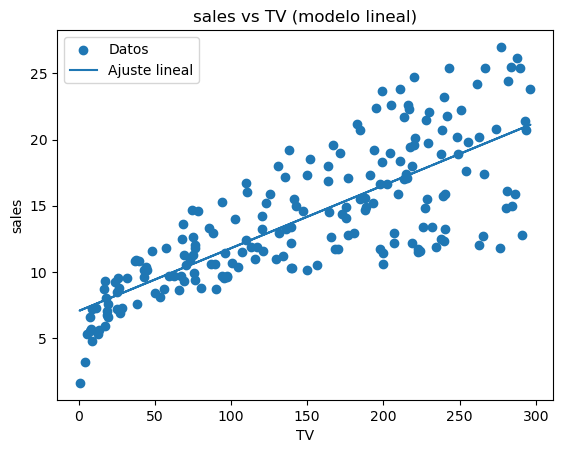

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Regresión lineal: ventas ~ TV
X = df[["TV"]]
y = df["sales"]

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

y_pred = model.predict(X)

r2 = model.score(X, y)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Intercepto (beta_0): {beta_0:.4f}")
print(f"Coeficiente TV (beta_1): {beta_1:.4f}")
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Gráfica: puntos + recta
plt.figure()
plt.scatter(df["TV"], df["sales"], label="Datos")
plt.plot(df["TV"], y_pred, label="Ajuste lineal")
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("sales vs TV (modelo lineal)")
plt.legend()
plt.show()


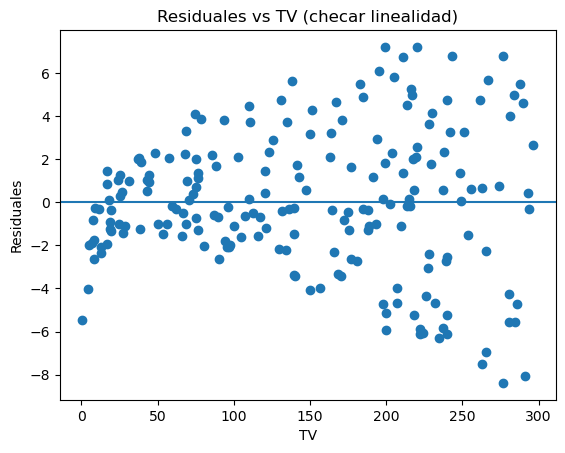

In [20]:
import matplotlib.pyplot as plt

X = df[["TV"]]
y = df["sales"]

model = LinearRegression()
model.fit(X, y)

resid = y - model.predict(X)

plt.figure()
plt.scatter(df["TV"], resid)
plt.axhline(0)
plt.xlabel("TV")
plt.ylabel("Residuales")
plt.title("Residuales vs TV (checar linealidad)")
plt.show()


In [24]:
X = df[["TV"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

pred_test = model.predict(X_test)

r2_test = r2_score(y_test, pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("R2 en TEST:", r2_test)
print("RMSE en TEST:", rmse_test)


R2 en TEST: 0.6606120390330493
RMSE en TEST: 3.029735726164873


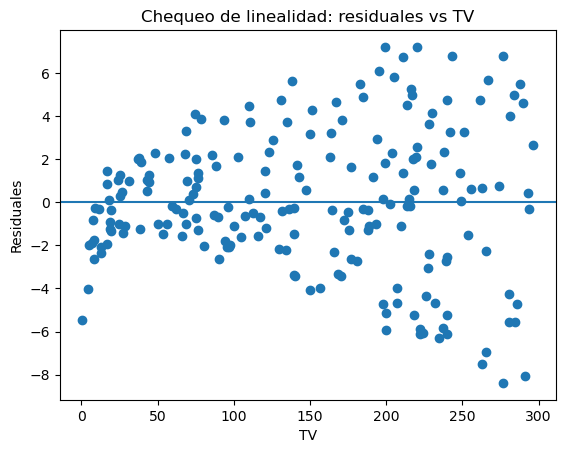

Correlación(residuales, TV): -3.5000130231000456e-16


In [ ]:
X = df[["TV"]]
y = df["sales"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
resid = y - y_pred

plt.figure()
plt.scatter(df["TV"], resid)
plt.axhline(0)
plt.xlabel("TV")
plt.ylabel("Residuales")
plt.title("Chequeo de linealidad: residuales vs TV")
plt.show()

corr_resid_tv = np.corrcoef(df["TV"], resid)[0, 1]
print("Correlación(residuales, TV):", corr_resid_tv)


Correlaciones con sales (más alto = más asociado):
sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

Modelo SIMPLE: sales ~ TV
beta0 (intercepto): 7.032593549127694
beta1 (TV): 0.04753664043301976
R2 (entrenado con todo): 0.611875050850071



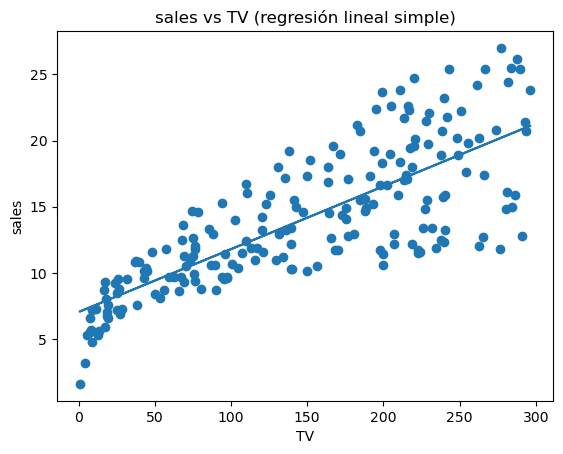

Modelo MULTIPLE: sales ~ TV + radio + newspaper
Intercepto: 2.9388893694594085
Coef TV: 0.04576464545539761
Coef radio: 0.18853001691820456
Coef newspaper: -0.00103749304247632
R2 (entrenado con todo): 0.8972106381789522

Predicción (Train/Test) usando TV+radio+newspaper
R2 en TEST: 0.8935163320163658
RMSE en TEST: 1.6970632663793628



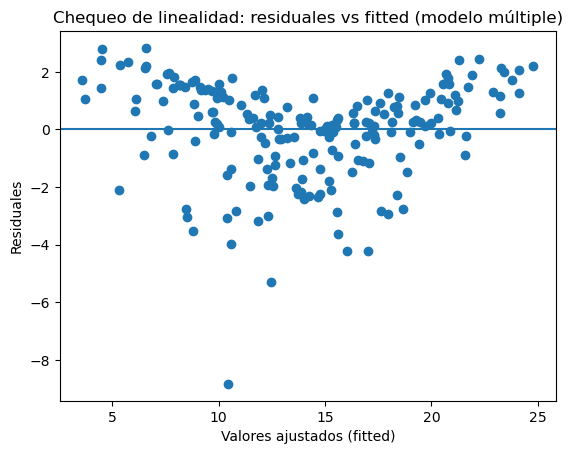

Modelo con INTERACCIÓN: + TV_radio (TV*radio)
R2 sin interacción: 0.8972106381789522
R2 con interacción: 0.9678222434748514
Coef interacción TV*radio: 0.0010873333343601572


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

print("Correlaciones con sales (más alto = más asociado):")
print(df[["TV","radio","newspaper","sales"]].corr(numeric_only=True)["sales"].sort_values(ascending=False))
print()

X_tv = df[["TV"]]
y = df["sales"]

m_tv = LinearRegression()
m_tv.fit(X_tv, y)

print("Modelo SIMPLE: sales ~ TV")
print("beta0 (intercepto):", m_tv.intercept_)
print("beta1 (TV):", m_tv.coef_[0])
print("R2 (entrenado con todo):", m_tv.score(X_tv, y))
print()

y_pred_tv = m_tv.predict(X_tv)
plt.figure()
plt.scatter(df["TV"], df["sales"])
plt.plot(df["TV"], y_pred_tv)
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("sales vs TV (regresión lineal simple)")
plt.show()

X_all = df[["TV","radio","newspaper"]]

m_all = LinearRegression()
m_all.fit(X_all, y)

print("Modelo MULTIPLE: sales ~ TV + radio + newspaper")
print("Intercepto:", m_all.intercept_)
print("Coef TV:", m_all.coef_[0])
print("Coef radio:", m_all.coef_[1])
print("Coef newspaper:", m_all.coef_[2])
print("R2 (entrenado con todo):", m_all.score(X_all, y))
print()

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y, test_size=0.25, random_state=42
)

m_pred = LinearRegression()
m_pred.fit(X_train, y_train)

pred_test = m_pred.predict(X_test)
r2_test = r2_score(y_test, pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print("Predicción (Train/Test) usando TV+radio+newspaper")
print("R2 en TEST:", r2_test)
print("RMSE en TEST:", rmse_test)
print()

fitted = m_all.predict(X_all)
resid = y - fitted

plt.figure()
plt.scatter(fitted, resid)
plt.axhline(0)
plt.xlabel("Valores ajustados (fitted)")
plt.ylabel("Residuales")
plt.title("Chequeo de linealidad: residuales vs fitted (modelo múltiple)")
plt.show()

df2 = df.copy()
df2["TV_radio"] = df2["TV"] * df2["radio"]

X_inter = df2[["TV","radio","newspaper","TV_radio"]]
y2 = df2["sales"]

m_inter = LinearRegression()
m_inter.fit(X_inter, y2)

print("Modelo con INTERACCIÓN: + TV_radio (TV*radio)")
print("R2 sin interacción:", m_all.score(X_all, y))
print("R2 con interacción:", m_inter.score(X_inter, y2))
print("Coef interacción TV*radio:", m_inter.coef_[3])


### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La poblacion muestra parametros reales pero no se conocen y la muestra estimamos esos parametros 

Si tuvieramos la poblacion podremos calcular la relacion real y con una muestra como son estimaciones podemos cambiar si tomamos otra muestra diferente

Aunque el modelo sea lineal no son los valores exactos ya que estimamos con un margen de error, con mejor muestra son mas precisos los coeficientes

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Dado los coeficientes nos dan de como estan realmente la poblacion y no hay incertidumbre del muestreo

hacemos la regresión con una muestra, tomáramos otra muestra diferente, podrían cambiar. Nos da los SE, intervalos de confianza y los p-values

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [30]:
import numpy as np

x = df["TV"].to_numpy()
y = df["sales"].to_numpy()

n = len(x)

X = np.column_stack((np.ones(n), x))

XtX_inv = np.linalg.inv(X.T @ X)
beta_hat = XtX_inv @ (X.T @ y)

b0_hat, b1_hat = beta_hat[0], beta_hat[1]

y_hat = X @ beta_hat
resid = y - y_hat

RSS = np.sum(resid**2)
p = 2  # parámetros: beta0 y beta1
sigma2_hat = RSS / (n - p)
RSE = np.sqrt(sigma2_hat)

print("beta0_hat:", b0_hat)
print("beta1_hat:", b1_hat)
print("RSS:", RSS)
print("sigma^2 estimada:", sigma2_hat)
print("RSE:", RSE)


beta0_hat: 7.032593549127725
beta1_hat: 0.047536640433019584
RSS: 2102.5305831313512
sigma^2 estimada: 10.618841328946218
RSE: 3.2586563686504624


In [31]:
import numpy as np

x_bar = np.mean(x)
Sxx = np.sum((x - x_bar)**2)

# SE(beta1)^2 = sigma^2 / Sxx
SE_b1 = np.sqrt(sigma2_hat / Sxx)

# SE(beta0)^2 = sigma^2 * (1/n + x_bar^2 / Sxx)
SE_b0 = np.sqrt(sigma2_hat * (1/n + (x_bar**2)/Sxx))

print("Sxx:", Sxx)
print("SE(beta0_hat):", SE_b0)
print("SE(beta1_hat):", SE_b1)


Sxx: 1466819.02875
SE(beta0_hat): 0.4578429402734785
SE(beta1_hat): 0.0026906071877968707


In [32]:
import numpy as np
from scipy.stats import t

dfree = n - 2
alpha = 0.05
tcrit = t.ppf(1 - alpha/2, dfree)

# t-stats
t_b0 = b0_hat / SE_b0
t_b1 = b1_hat / SE_b1

# IC 95%
CI_b0 = (b0_hat - tcrit*SE_b0, b0_hat + tcrit*SE_b0)
CI_b1 = (b1_hat - tcrit*SE_b1, b1_hat + tcrit*SE_b1)

print("Grados de libertad:", dfree)
print("t crítico (95%):", tcrit)

print("\n--- t-stats ---")
print("t(beta0):", t_b0)
print("t(beta1):", t_b1)

print("\n--- Intervalos 95% ---")
print("IC beta0:", CI_b0)
print("IC beta1:", CI_b1)


Grados de libertad: 198
t crítico (95%): 1.9720174778338955

--- t-stats ---
t(beta0): 15.360275174117614
t(beta1): 17.667625600875482

--- Intervalos 95% ---
IC beta0: (np.float64(6.129719268805565), np.float64(7.935467829449885))
IC beta1: (np.float64(0.04223071603269865), np.float64(0.052842564833340516))


Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [33]:
# Intervalos 95% aproximados: beta_hat ± 2*SE(beta_hat)

CI_b0 = (b0_hat - 2*SE_b0, b0_hat + 2*SE_b0)
CI_b1 = (b1_hat - 2*SE_b1, b1_hat + 2*SE_b1)

print("IC 95% aprox para beta0:", CI_b0)
print("IC 95% aprox para beta1:", CI_b1)


IC 95% aprox para beta0: (np.float64(6.116907668580768), np.float64(7.948279429674682))
IC 95% aprox para beta1: (np.float64(0.042155426057425845), np.float64(0.05291785480861332))


In [ ]:
print(f"beta0_hat = {b0_hat:.4f}  |  SE = {SE_b0:.4f}  |  IC95% ≈ [{CI_b0[0]:.4f}, {CI_b0[1]:.4f}]")
print(f"beta1_hat = {b1_hat:.4f}  |  SE = {SE_b1:.4f}  |  IC95% ≈ [{CI_b1[0]:.4f}, {CI_b1[1]:.4f}]")

zero_in_CI_b1 = (CI_b1[0] <= 0 <= CI_b1[1])
print("\n¿El intervalo de beta1 incluye 0?:", zero_in_CI_b1)


beta0_hat = 7.0326  |  SE = 0.4578  |  IC95% ≈ [6.1169, 7.9483]
beta1_hat = 0.0475  |  SE = 0.0027  |  IC95% ≈ [0.0422, 0.0529]

¿El intervalo de beta1 incluye 0?: False


In [35]:
from scipy.stats import t

dfree = n - 2
tcrit = t.ppf(0.975, dfree)

CI_b0_t = (b0_hat - tcrit*SE_b0, b0_hat + tcrit*SE_b0)
CI_b1_t = (b1_hat - tcrit*SE_b1, b1_hat + tcrit*SE_b1)

print("t crítico:", tcrit)
print("IC 95% (t) para beta0:", CI_b0_t)
print("IC 95% (t) para beta1:", CI_b1_t)


t crítico: 1.9720174778338955
IC 95% (t) para beta0: (np.float64(6.129719268805565), np.float64(7.935467829449885))
IC 95% (t) para beta1: (np.float64(0.04223071603269865), np.float64(0.052842564833340516))


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipotesis nula se sabe que no hay relacion entre la X y Y, en la regresion el coeficiente de la pendiente es 0, si la x cambia la y no lo hace

La hipotesis alternativa es lo contrario a la nula, hay relacion en ambas variables y la pendiente cambia no es cero la x se relaciona a los cambios que hay en y y puede ser positiva o negativa 

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [44]:
mu = 0  # valor bajo H0

t_bj0 = (b0_hat - mu) / SE_b0
t_bj1 = (b1_hat - mu) / SE_b1

print("t(beta0):", t_bj0)
print("t(beta1):", t_bj1)


t(beta0): 15.360275174117614
t(beta1): 17.667625600875482


In [45]:
from scipy.stats import t

dfree = n - 2  # n - p, con p=2

p_b0 = 2 * (1 - t.cdf(abs(t_b0), dfree))
p_b1 = 2 * (1 - t.cdf(abs(t_b1), dfree))

print("Grados de libertad:", dfree)
print("p-value beta0 (dos colas):", p_b0)
print("p-value beta1 (dos colas):", p_b1)


Grados de libertad: 198
p-value beta0 (dos colas): 0.0
p-value beta1 (dos colas): 0.0


In [46]:
alpha = 0.05

print("Decisión para beta0:")
print("Rechazar H0" if p_b0 < alpha else "No rechazar H0")

print("\nDecisión para beta1:")
print("Rechazar H0" if p_b1 < alpha else "No rechazar H0")


Decisión para beta0:
Rechazar H0

Decisión para beta1:
Rechazar H0


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [47]:
from scipy import stats
p_b1 = 2 * (1 - stats.t.cdf(np.abs(t_b1), n - p))
print("p-value beta1:", p_b1)

p-value beta1: 0.0


In [48]:
mu = 0
t_bj = (b1_hat - mu) / SE_b1
print("t_bj (para beta1):", t_bj)


t_bj (para beta1): 17.667625600875482


In [49]:
mu = 0
t_b0 = (b0_hat - mu) / SE_b0
t_b1 = (b1_hat - mu) / SE_b1

print("t_bj para j=0:", t_b0)
print("t_bj para j=1:", t_b1)


t_bj para j=0: 15.360275174117614
t_bj para j=1: 17.667625600875482


In [ ]:
import numpy as np
from scipy import stats

p = 2
dfree = n - p

t_bj = t_b1  
p_bj = 2 * (1 - stats.t.cdf(np.abs(t_bj), dfree))
print("p_bj:", p_bj)


p_bj: 0.0


In [39]:
import numpy as np
from scipy import stats

p = 2          # numero de parametros (beta0 y beta1)
dfree = n - p  # grados de libertad

p_b0 = 2 * (1 - stats.t.cdf(np.abs(t_b0), dfree))
print("p-value beta0:", p_b0)


p-value beta0: 0.0


In [40]:
import numpy as np
from scipy import stats

p = 2
dfree = n - p

p_b1 = 2 * (1 - stats.t.cdf(np.abs(t_b1), dfree))
print("p-value beta1:", p_b1)


p-value beta1: 0.0


In [41]:
alpha = 0.05

print("Decisión beta0:")
print("Rechazar H0 (beta0 = 0)" if p_b0 < alpha else "No rechazar H0 (beta0 = 0)")

print("\nDecisión beta1:")
print("Rechazar H0 (beta1 = 0)" if p_b1 < alpha else "No rechazar H0 (beta1 = 0)")


Decisión beta0:
Rechazar H0 (beta0 = 0)

Decisión beta1:
Rechazar H0 (beta1 = 0)


¿Se rechaza la hipótesis nula? ¿Qué significa?

El p-value es menor que 0.05, es dificil observar un valor de t

Si existe una relacion entre x y Y, como TV y ventas, y los cambios en la X se relacionan con la Y

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

In [52]:
import numpy as np
from scipy import stats

if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

def resumen_regresion_simple(df, x_col, y_col="sales"):
    x = df[x_col].to_numpy()
    y = df[y_col].to_numpy()
    n = len(x)
    p = 2  # beta0 y beta1
    
    # Matriz de diseño [1, x]
    X = np.column_stack((np.ones(n), x))
    
    # Estimar betas por MCO: (X'X)^-1 X'y
    XtX_inv = np.linalg.inv(X.T @ X)
    beta_hat = XtX_inv @ (X.T @ y)
    b0_hat, b1_hat = beta_hat[0], beta_hat[1]
    
    # Predicción y residuales
    y_hat = X @ beta_hat
    resid = y - y_hat
    
    # RSS, sigma^2 y RSE
    RSS = np.sum(resid**2)
    sigma2_hat = RSS / (n - p)
    RSE = np.sqrt(sigma2_hat)
    
    # Errores estándar con fórmulas de regresión simple
    x_bar = np.mean(x)
    Sxx = np.sum((x - x_bar)**2)
    
    SE_b1 = np.sqrt(sigma2_hat / Sxx)
    SE_b0 = np.sqrt(sigma2_hat * (1/n + (x_bar**2)/Sxx))
    
    # t-stat (mu = 0)
    mu = 0
    t_b0 = (b0_hat - mu) / SE_b0
    t_b1 = (b1_hat - mu) / SE_b1
    
    # p-values dos colas
    dfree = n - p
    p_b0 = 2 * (1 - stats.t.cdf(np.abs(t_b0), dfree))
    p_b1 = 2 * (1 - stats.t.cdf(np.abs(t_b1), dfree))
    
    # IC 95% aproximado: beta ± 2*SE (como indica tu slide)
    CI_b0 = (b0_hat - 2*SE_b0, b0_hat + 2*SE_b0)
    CI_b1 = (b1_hat - 2*SE_b1, b1_hat + 2*SE_b1)
    
    # ---- PRINT ORDENADO ----
    print("="*60)
    print(f"Título de regresión: {y_col} ~ {x_col}")
    print("="*60)
    print(f"Observaciones (n): {n}")
    print()
    
    print("Coeficientes estimados:")
    print(f"  beta0_hat (intercepto): {b0_hat:.6f}")
    print(f"  beta1_hat ({x_col}):     {b1_hat:.6f}")
    print()
    
    print("Errores estándar de los coeficientes:")
    print(f"  SE(beta0_hat): {SE_b0:.6f}")
    print(f"  SE(beta1_hat): {SE_b1:.6f}")
    print()
    
    print("Intervalos de confianza 95% (aprox ± 2*SE):")
    print(f"  IC beta0: [{CI_b0[0]:.6f}, {CI_b0[1]:.6f}]")
    print(f"  IC beta1: [{CI_b1[0]:.6f}, {CI_b1[1]:.6f}]")
    print()
    
    print("Estadísticos t (H0: beta = 0):")
    print(f"  t(beta0): {t_b0:.6f}")
    print(f"  t(beta1): {t_b1:.6f}")
    print()
    
    print("p-values (dos colas):")
    print(f"  p(beta0): {p_b0:.6e}")
    print(f"  p(beta1): {p_b1:.6e}")
    print()
    
    print("Extras:")
    print(f"  RSS: {RSS:.6f}")
    print(f"  RSE: {RSE:.6f}")
    print("="*60)


In [53]:
resumen_regresion_simple(df, "radio", "sales")


Título de regresión: sales ~ radio
Observaciones (n): 200

Coeficientes estimados:
  beta0_hat (intercepto): 9.311638
  beta1_hat (radio):     0.202496

Errores estándar de los coeficientes:
  SE(beta0_hat): 0.562900
  SE(beta1_hat): 0.020411

Intervalos de confianza 95% (aprox ± 2*SE):
  IC beta0: [8.185837, 10.437439]
  IC beta1: [0.161673, 0.243318]

Estadísticos t (H0: beta = 0):
  t(beta0): 16.542245
  t(beta1): 9.920765

p-values (dos colas):
  p(beta0): 0.000000e+00
  p(beta1): 0.000000e+00

Extras:
  RSS: 3618.479549
  RSE: 4.274944


In [54]:
resumen_regresion_simple(df, "newspaper", "sales")


Título de regresión: sales ~ newspaper
Observaciones (n): 200

Coeficientes estimados:
  beta0_hat (intercepto): 12.351407
  beta1_hat (newspaper):     0.054693

Errores estándar de los coeficientes:
  SE(beta0_hat): 0.621420
  SE(beta1_hat): 0.016576

Intervalos de confianza 95% (aprox ± 2*SE):
  IC beta0: [11.108567, 13.594247]
  IC beta1: [0.021542, 0.087845]

Estadísticos t (H0: beta = 0):
  t(beta0): 19.876096
  t(beta1): 3.299591

p-values (dos colas):
  p(beta0): 0.000000e+00
  p(beta1): 1.148196e-03

Extras:
  RSS: 5134.804544
  RSE: 5.092480


## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [55]:
import statsmodels.api as sm

# Variable respuesta
Y = df["sales"]

# Variables predictoras
X = df[["TV", "radio", "newspaper"]]

# Agregar intercepto (columna de 1s)
X = sm.add_constant(X)

# Ajustar modelo
ols = sm.OLS(Y, X)
results = ols.fit()


In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 03 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        01:22:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
import pandas as pd

tabla = pd.DataFrame({
    "coef": results.params,
    "std_err": results.bse,
    "t": results.tvalues,
    "p_value": results.pvalues
})

ic = results.conf_int(alpha=0.05)
ic.columns = ["IC_2.5%", "IC_97.5%"]

tabla = tabla.join(ic)

tabla


,coef,std_err,t,p_value,IC_2.5%,IC_97.5%
const,2.938889,0.311908,9.422288,1.267295e-17,2.323762,3.554016
TV,0.045765,0.001395,32.808624,1.509960e-81,0.043014,0.048516
radio,0.188530,0.008611,21.893496,1.505339e-54,0.171547,0.205513
newspaper,-0.001037,0.005871,-0.176715,8.599151e-01,-0.012616,0.010541


¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

En una regresión simple, los p-values suelen salir más bajos y pues cada variable se analiza sola, puede estar relacionada con otras. En una regresión múltiple, los p-values pueden subir si los predictores están correlacionados, porque el modelo intenta separar qué aporta cada uno por separado. Al controlar por las demás variables, un predictor puede verse menos importante y por eso cambian los p-values.

Yo creo que existen estas diferencias es porque la simple es mas directa la variable y la multiple es para ver el efecto de cada variable, es decir la simple nos dice que si o no hay relacion y la multiple nos hace lo contrario nos dice que tanto aporta cada una 

In [ ]:
import statsmodels.api as sm
import pandas as pd

y = df["sales"]

p_simple = {}

for col in ["TV", "radio", "newspaper"]:
    Xs = sm.add_constant(df[[col]])      
    res = sm.OLS(y, Xs).fit()
    p_simple[col] = res.pvalues[col]    

p_simple


{'TV': np.float64(1.467389700194655e-42),
 'radio': np.float64(4.354966001766476e-19),
 'newspaper': np.float64(0.001148195868888239)}

In [59]:
import statsmodels.api as sm

y = df["sales"]
X = df[["TV", "radio", "newspaper"]]
X = sm.add_constant(X)

res_m = sm.OLS(y, X).fit()

res_m.pvalues[["TV", "radio", "newspaper"]]


TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [60]:
import pandas as pd

tabla = pd.DataFrame({
    "p_simple": pd.Series(p_simple),
    "p_multiple": res_m.pvalues[["TV", "radio", "newspaper"]]
})

print("Comparación de p-values (simple vs múltiple):")
display(tabla)

print("\nCorrelación entre medios (posible colinealidad):")
display(df[["TV", "radio", "newspaper"]].corr())


Comparación de p-values (simple vs múltiple):


,p_simple,p_multiple
TV,1.467390e-42,1.509960e-81
radio,4.354966e-19,1.505339e-54
newspaper,1.148196e-03,8.599151e-01



Correlación entre medios (posible colinealidad):


,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*

In [67]:
import numpy as np
from scipy import stats
import pandas as pd

y = df["sales"].to_numpy()
X_raw = df[["TV", "radio", "newspaper"]].to_numpy()
n = len(y)
p = X_raw.shape[1] + 1  # +1 por intercepto
X = np.column_stack((np.ones(n), X_raw))
beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)
y_hat = X @ beta_hat
resid = y - y_hat
RSS = np.sum(resid**2)

rse2 = RSS / (n - p)
RSE = np.sqrt(rse2)

var_beta = rse2 * np.linalg.inv(X.T @ X)

std_beta = np.sqrt(np.diag(var_beta))

t_stats = beta_hat / std_beta

dfree = n - p
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), dfree))

nombres = ["const", "TV", "radio", "newspaper"]
tabla = pd.DataFrame({
    "coef": beta_hat,
    "std_err": std_beta,
    "t": t_stats,
    "p_value": p_values
}, index=nombres)

print("Observaciones (n):", n)
print("Parámetros (p):", p)
print("Grados de libertad (n-p):", dfree)
print("RSS:", RSS)
print("RSE:", RSE)
display(tabla)

Observaciones (n): 200
Parámetros (p): 4
Grados de libertad (n-p): 196
RSS: 556.8252629021872
RSE: 1.685510373414744


,coef,std_err,t,p_value
const,2.938889,0.311908,9.422288,0.000000
TV,0.045765,0.001395,32.808624,0.000000
radio,0.188530,0.008611,21.893496,0.000000
newspaper,-0.001037,0.005871,-0.176715,0.859915
